Tarjan's Algorithm

 Preliminaries

Strongly Connected Components:
Given a directed graph $G = (V, E)$, a subgraph $H = (V^*, E^*)$ is said to be a strongly connected component if and only if for any pair of vertices $u, v \in V^*$ there exists paths from $u$ to $v$, and from $v$ to $u$ in $E^*$.

 Pseudocode

    procedure find_scc(G, root_node):
        #initialize discovery time and low value, node stack and boolean array
        disc[root_node] = time
        low[root_node] = time
        time += 1
        node_stack.append(root_node)
        instack[root_node] = True
        
        #go through all vertices adjacent to this
        for a, b in G.edges(nbunch=root_node):
            if b not in disc:
                find_scc(G, b)
                low[root_node] = min(low[root_node], low[b])
            else:
                if instack[b] == True:
                    low[root_node] = min(low[root_node], disc[b])
                    
        #we found a root node for an scc, pop stack until root node
        w = -1 
        if low[root_node] == disc[root_node]:
            while w != root_node:
                w = node_stack.pop()
                instack[w] = False
    

To finilize Tarjan, we can use this as a function inside, looping through all the nodes of G

    procedure Tarjan(G):
        for each node in G.nodes():
            if disc[node] == -1:
                find_scc(G, node)

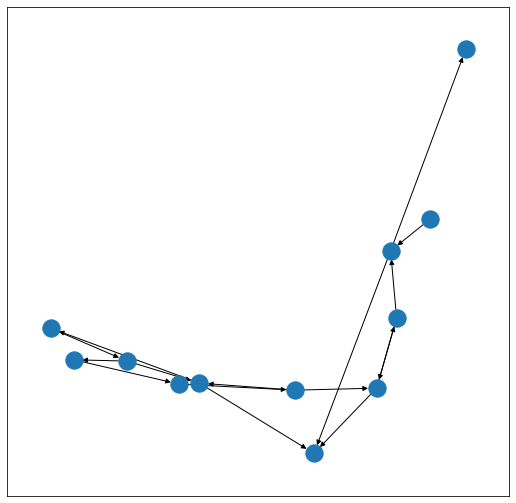

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([[0, 1], [0, 3], [1, 2], [2, 0], [2, 4], [4, 5], [5, 6], [6, 0], [6, 7], [7, 8], 
                 [8, 7], [8, 9], [9, 3], [9, 10], [7, 3], [11, 9]])

pos = nx.spring_layout(G)

plt.figure(figsize=(9,9))
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G, pos)
None

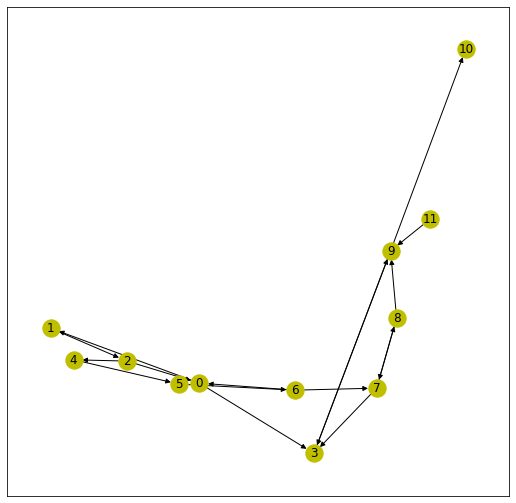

In [23]:
G.add_edge(3, 9)

plt.figure(figsize=(9, 9))
nx.draw_networkx_nodes(G, pos, node_color = 'y')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
None

In [24]:
def find_scc(G, origin_node, time, low, disc, node_stack,instack):
    disc[origin_node] = time    #origin node is the root node here
    low[origin_node] = time
    time += 1
    node_stack.append(origin_node) #adding the root node to stack
    instack[origin_node] = True  #setting the node as visited

    #go over all vertices adjacent to this
    for a, b in G.edges(nbunch=origin_node):
        if disc[b] == -1: #iterate if the node is not visited
            find_scc(G, b, time, low, disc, node_stack, instack)
            #it finds strongly connected graph G
            low[origin_node] = min(low[origin_node], low[b]) #after comparision, the value of the node with lowest value is changed
        else:
            if instack[b] == True: #the value of origin node changes only if b has low value
                low[origin_node] = min(low[origin_node], disc[b])

    #here we have found a origin node for an strongly connected components, pop stack until origin node
    x = -1 #x stores the vertices that are extracted
    if low[origin_node] == disc[origin_node]:
        while x != origin_node:
            x = node_stack.pop()
            print(x, end=" ")
            instack[x] = False
        print()
            
def Tarjan(G):
    
    disc = {node:-1 for node in G.nodes()}  #all vertices are initialized as they have been visited
    low = {node:-1 for node in G.nodes()} #setting all the values to same
    time = 0
    node_stack = [] #initialization of stack to null
    instack = {node:False for node in G.nodes()} #initialization of the articulation point array

    for node in G.nodes():
        if disc[node] == -1:  #verifies if the node is not visited
            find_scc(G, node, time, low,disc,node_stack, instack)

In [25]:
#strongly connected components of a given directed graph is as follows
Tarjan(G)

10 
3 9 
8 7 
6 5 4 2 1 0 
11 
